#<font size = "+4" color = '#FF0000'><b> Problem Statement<b/></font>
    
    
    
<font size = "+1" color = '#0000FF'><b> TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over
4,000 TED talks including transcripts in many languages.
Founded in 1984 by Richard Salman as a nonprofit organization
that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all
walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000
talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,
Jimmy Wales, Shahrukh Khan, and Bill Gates.
The main objective is to build a predictive model, which could help in predicting the views of
    the videos uploaded on the TEDx website.<b/></font>


<font size = "+2" color = '#FF0000'><b>Project Roadmap<b/></font>
  
   * 1) Data understanding.
    (i)What is data all about, how many features and observations.
    (ii) What are the columns and referring to what datatypes.
    (iii)Understanding problem statement and data features manually or by just observing from dataset.
    
 
  1.1)Importing Libraries.
  
   2.)Loading the Dataset.

  3.)EDA and data cleaning.

  4.)Feature Engineering.

  5.)Fitting the regression models and HyperParameter Tuning.

  6.)Comparison of Models.

  7.)Final selection of the model.

  8.)Conclusions.

<font size = "+4" color = '#FF0000'><b>Importing Libraries<b/></font>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (7,4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud,ImageColorGenerator
pd.plotting.register_matplotlib_converters()
import calendar
!pip install scikit-optimize
!pip install catboost
import sklearn

from sklearn.model_selection import ShuffleSplit , StratifiedKFold , RepeatedStratifiedKFold ,train_test_split
from sklearn.model_selection import cross_val_score , cross_validate ,cross_val_predict

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix as confmat
from sklearn.metrics import precision_recall_curve , classification_report

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [6]:
import os

In [7]:
pwd()# finding present working directory

'C:\\Users\\Sunny.Kumar'

In [8]:
os.chdir('C:\\Users\\Sunny.Kumar\\Desktop\\Regression project\\Ted_talks(Capstone)') # changing my dirrectory to  where data is available

In [9]:
pwd() # confirming the present working dirrectory if changed!

'C:\\Users\\Sunny.Kumar\\Desktop\\Regression project\\Ted_talks(Capstone)'

In [12]:
data = pd.read_csv('data_ted_talks.csv') # reading dataset from local system

<font size = "+4" color = '#FF0000'><b>Exploratory Data Analysis<b/></font>

In [14]:
data # checking dataset if loaded

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society

In [15]:
data.head()# checking top rows of data

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [16]:
data.tail()#checking last rows of data

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


In [18]:
data.shape #checking shape of data having 4005 observations with 19 variables

(4005, 19)

In [19]:
data.corr()# checijng correlation we can see that we have only few numerical columns for correlation.

,talk_id,views,comments,duration
talk_id,1.000000,-0.113291,-0.232926,-0.261955
views,-0.113291,1.000000,0.500748,0.073642
comments,-0.232926,0.500748,1.000000,0.175234
duration,-0.261955,0.073642,0.175234,1.000000


In [20]:
data.describe() # discriptive statistics for data

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [53]:
data.describe(include='object').T # describing data

,count,unique,top,freq
title,4005,4005,The nit-picking glory of The New Yorker's Comm...,1
speaker_1,4005,3274,Alex Gendler,34
all_speakers,4001,3306,{0: 'Alex Gendler'},34
occupations,3483,2049,{0: ['writer']},53
about_speakers,3502,2977,{0: 'Alex Rosenthal takes everyday experiences...,10
recorded_date,4004,1334,2017-04-24,97
published_date,4005,2962,2017-09-07,27
event,4005,459,TED-Ed,556
native_lang,4005,12,en,3957
available_lang,4005,3902,['en'],24


In [22]:
data.dtypes # checkijng the datatpes of the variabales

talk_id             int64
title              object
speaker_1          object
all_speakers       object
occupations        object
about_speakers     object
views               int64
recorded_date      object
published_date     object
event              object
native_lang        object
available_lang     object
comments          float64
duration            int64
topics             object
related_talks      object
url                object
description        object
transcript         object
dtype: object

**We can see that we have only 3-4 variables which are numerical except these rest will required label encoding before we process for ML modeling.**

In [30]:
type(data)# checking type of dataset

pandas.core.frame.DataFrame

In [52]:
data.nunique()#checking the unique values in each columns.

talk_id           4005
title             4005
speaker_1         3274
all_speakers      3306
occupations       2049
about_speakers    2977
views             3996
recorded_date     1334
published_date    2962
event              459
native_lang         12
available_lang    3902
comments           601
duration          1188
topics            3977
related_talks     4005
url               4005
description       4005
transcript        4005
dtype: int64

In [50]:
data.nunique()*100/len(data) #checking the unique values in each columns according to percentage for better clarity.

talk_id           100.000000
title             100.000000
speaker_1          81.747815
all_speakers       82.546816
occupations        51.161049
about_speakers     74.332085
views              99.775281
recorded_date      33.308365
published_date     73.957553
event              11.460674
native_lang         0.299625
available_lang     97.428215
comments           15.006242
duration           29.662921
topics             99.300874
related_talks     100.000000
url               100.000000
description       100.000000
transcript        100.000000
dtype: float64

In [41]:
data.isna() #checking na's in true and false fashion.

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4001,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False
4002,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4003,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False


In [43]:
data.isnull().sum() # checking total na's in the each columns

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [40]:
data.isna().sum()*100/len(data)# checking total number of na's in each columns in term of percentage

talk_id            0.000000
title              0.000000
speaker_1          0.000000
all_speakers       0.099875
occupations       13.033708
about_speakers    12.559301
views              0.000000
recorded_date      0.024969
published_date     0.000000
event              0.000000
native_lang        0.000000
available_lang     0.000000
comments          16.354557
duration           0.000000
topics             0.000000
related_talks      0.000000
url                0.000000
description        0.000000
transcript         0.000000
dtype: float64

**From this we can conclude that our data has 3 columns containing 13.03,12.55,16.35% of null vlaues available.**
* occupation =  13.033708%
* about_speakers = 12.559301%
* comments        = 16.354557%


In [60]:
data.columns.value_counts()# checking how many columns are avaialble, so in future we can select useful and can drop useless columns

event             1
related_talks     1
occupations       1
published_date    1
all_speakers      1
url               1
description       1
talk_id           1
comments          1
transcript        1
available_lang    1
native_lang       1
speaker_1         1
recorded_date     1
title             1
about_speakers    1
topics            1
duration          1
views             1
dtype: int64

In [64]:
data.max().value_counts() #returns the maximum of the values in the given data and counting them.

♫ Where do we go from here? ♫ ♫ How do we carry on? ♫ ♫ I can't get beyond the questions ♫ ♫ Clambering for the scraps ♫ ♫ in the shatter of us, collapsed ♫ ♫ It cuts me with every could have been ♫ ♫ Pain on pain on play, repeating ♫ ♫ With the backup, makeshift life in waiting ♫ ♫ Everybody says ♫ ♫ time heals everything ♫ ♫ What of the wretched hollow? ♫ ♫ The endless in between? ♫ ♫ Are we just going to wait it out? ♫ ♫ There is nothing to see here now ♫ ♫ Turning the sign around ♫ ♫ We're closed to the Earth 'til further notice ♫ ♫ A crumbling cliche case ♫ ♫ crumpled and puffy faced ♫ ♫ caught dead in the stare of a thousand miles ♫ ♫ All I want, only one street level miracle ♫ ♫ I'll be an out and out born again ♫ ♫ from none more cynical ♫ ♫ Everybody says ♫ ♫ that time heals everything ♫ ♫ But what of the wretched hollow? ♫ ♫ The endless in between? ♫ ♫ Are we just going to wait it out? ♫ ♫ And sit here cold? ♫ ♫ We will be long gone by then ♫ ♫ In lackluster ♫ ♫ In dust we la

In [65]:
data.min().value_counts()#returns the manimum of the values in the given data and counting them.

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

<font size = "+3" color = '#FF0000'><b>Visualization<b/></font>

<AxesSubplot:xlabel='duration'>

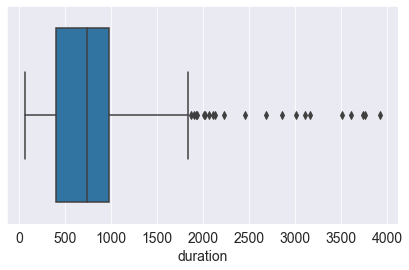

In [90]:
sns.boxplot(data['duration'])# checking outlier in some of the columns.

* From above boxplot its clearly evident that values above 1800 are outliers.

<AxesSubplot:xlabel='comments'>

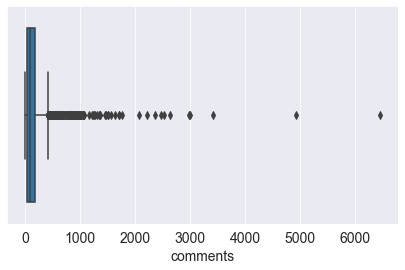

In [153]:
sns.boxplot(data['comments'])# checking boxplot for Comments

<AxesSubplot:xlabel='views'>

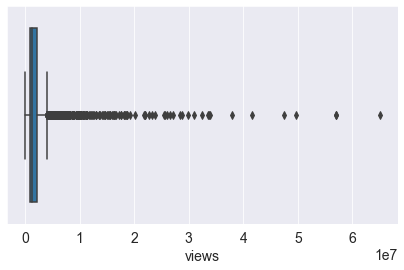

In [98]:
sns.boxplot(data['views'])

* From above boxplot we can conclude that we have much number of views acting as outlier.
* Much numbers of comments acting as outliers
* Much numbers of duration acting as outliers.

# **Let's see box plot for entire columns**

In [101]:
df = pd.DataFrame(data = np.random.random(size=(19,19)), columns = ['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations','about_speakers', 'views', 'recorded_date', 'published_date', 'event','native_lang', 'available_lang', 'comments', 'duration', 'topics','related_talks', 'url', 'description', 'transcript'])


<AxesSubplot:>

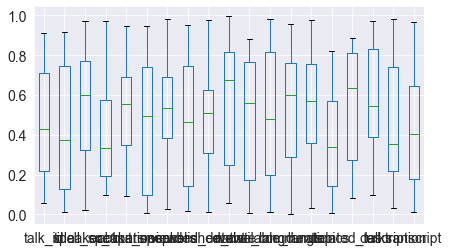

In [104]:
df.boxplot() # just checking the outlier at one place for all the columns

In [105]:
data.columns # checking columns in data

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

* From above visualization we saw that we have few columns which we need to remove and are unwanted.

**lets perform numeric variables Visualization.**

<AxesSubplot:xlabel='views', ylabel='Density'>

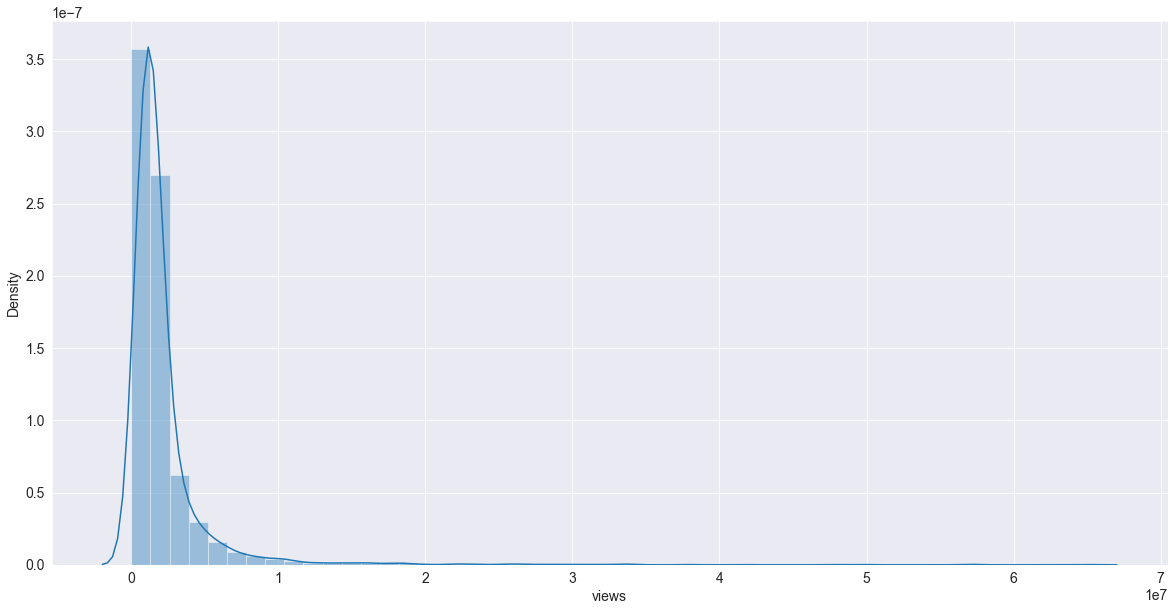

In [106]:
#visualizing views:(Distplot= for checking single variable distribution of data(UNIVARIATE))
plt.figure(figsize=(20,10))
sns.distplot(data['views'])

In [149]:
Mean =(data['views'].mean()) # checing mean of the data in views means lies around 1375508.0

In [150]:
Mode = (data['views'].mode())# checing mode of the data in views seems 0

In [151]:
Median =(data['views'].median())# checing median of the data in views median lies around 1

In [152]:
print(f'Mean for the Views is:{Mean}')
print(f'Mode for the Views is:{Mode}')
print(f'Median for the Views is:{Median}')

Mean for the Views is:2148005.5737827714
Mode for the Views is:0    0
dtype: int64
Median for the Views is:1375508.0


**From above distplot we can conclude that we have:**
* Views are right skewed.
* Views have positive skew distribution of data.
* Mean is greater than mode.
* Mean is greater than median as well.

In [147]:
Mean =(data['views'].mean()) # checing mean of the data in views means lies around 1375508.0

<AxesSubplot:xlabel='duration', ylabel='Density'>

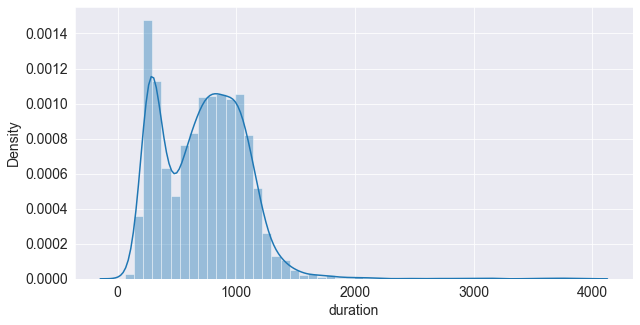

In [154]:
#visualization of duration using distplot
plt.figure(figsize=(10,5))
sns.distplot(data['duration'])

<AxesSubplot:xlabel='comments', ylabel='Density'>

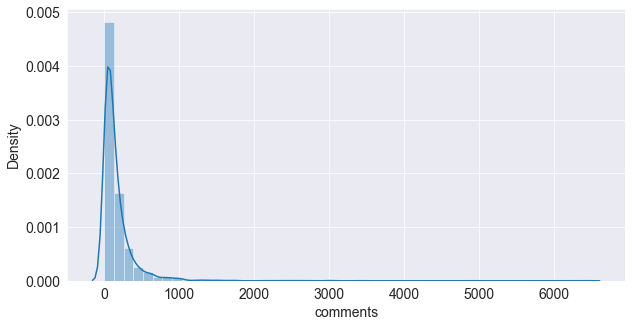

In [155]:
##visualization of the comments using distplot
plt.figure(figsize=(10,5))
sns.distplot(data['comments'])